In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Read the xlsx file into a pandas dataframe
df = pd.read_excel('comp.xlsx')
df

,N2,CO2,H2S,C1,C2,C3,C4,C5,C6,C7 +,GR.C7+,MWC7+,Temp.,Ps,Ps-model,Ps-SRK,Ps-PR
0,0.36,0.17,0.0,27.23,8.93,8.60,6.07,3.71,2.55,42.38,0.879,271.0,130.0,1365,1429,1602,1431
1,0.29,0.48,0.0,28.36,8.29,7.38,5.06,3.42,4.41,42.31,0.880,252.0,133.0,1632,1544,1672,1477
2,0.33,0.22,0.0,25.56,6.87,6.39,5.61,4.68,4.33,46.01,0.878,222.0,133.0,1595,1442,1441,1252
3,0.35,0.47,0.0,26.52,7.71,6.05,4.03,4.08,4.22,46.57,0.892,253.0,135.0,1500,1427,1613,1380
4,0.12,0.51,0.0,28.81,7.91,6.46,3.17,2.07,3.25,47.70,0.876,250.0,134.0,1615,1574,1665,1476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.03,8.39,0.0,47.43,10.29,6.12,4.20,2.89,2.05,18.61,0.830,180.0,295.0,4000,4460,3933,3879
126,0.52,6.47,0.0,39.58,10.68,7.27,5.28,3.65,2.90,23.67,0.858,176.0,310.0,3627,3830,3418,3198
127,0.34,7.10,0.0,48.43,9.24,5.84,4.39,3.21,2.28,19.17,0.805,183.0,314.0,4082,4566,3743,3902
128,0.38,7.03,0.0,48.73,8.93,5.48,4.05,3.00,2.14,20.26,0.805,181.0,309.0,4156,4568,3740,3871


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   N2        130 non-null    float64
 1   CO2       130 non-null    float64
 2   H2S       130 non-null    float64
 3   C1        130 non-null    float64
 4   C2        130 non-null    float64
 5   C3        130 non-null    float64
 6   C4        130 non-null    float64
 7   C5        130 non-null    float64
 8   C6        130 non-null    float64
 9   C7 +      130 non-null    float64
 10  GR.C7+    130 non-null    float64
 11  MWC7+     130 non-null    float64
 12  Temp.     130 non-null    float64
 13  Ps        130 non-null    int64  
 14  Ps-model  130 non-null    int64  
 15  Ps-SRK    130 non-null    int64  
 16  Ps-PR     130 non-null    int64  
dtypes: float64(13), int64(4)
memory usage: 17.4 KB


In [80]:
df.iloc[:, :14].describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
N2,130.0,0.359431,0.373803,0.000,0.1025,0.275,0.4725,1.670
CO2,130.0,1.092846,1.610416,0.000,0.1725,0.550,1.1500,9.110
H2S,130.0,0.139538,0.491345,0.000,0.0000,0.000,0.0000,3.680
C1,130.0,33.097615,13.886356,5.630,25.5075,31.075,41.5625,74.180
C2,130.0,7.354231,2.388989,0.840,6.2975,7.475,8.7450,12.450
C3,130.0,6.327462,2.056450,0.430,5.4275,6.480,7.4375,11.870
C4,130.0,4.575077,1.638685,0.950,3.5925,4.445,5.6175,8.400
C5,130.0,3.274615,1.349792,0.400,2.2900,3.150,4.1575,6.650
C6,130.0,3.195846,1.321837,0.000,2.2950,3.235,4.0875,6.650
C7 +,130.0,40.625692,13.594376,10.720,31.5300,41.850,47.6525,83.200


In [81]:
df.isna().any()

N2          False
CO2         False
H2S         False
C1          False
C2          False
C3          False
C4          False
C5          False
C6          False
C7 +        False
GR.C7+      False
MWC7+       False
Temp.       False
Ps          False
Ps-model    False
Ps-SRK      False
Ps-PR       False
dtype: bool

In [82]:
df[df.isnull().any(axis=1)]

,N2,CO2,H2S,C1,C2,C3,C4,C5,C6,C7 +,GR.C7+,MWC7+,Temp.,Ps,Ps-model,Ps-SRK,Ps-PR


In [83]:
df[df.duplicated()]

,N2,CO2,H2S,C1,C2,C3,C4,C5,C6,C7 +,GR.C7+,MWC7+,Temp.,Ps,Ps-model,Ps-SRK,Ps-PR
80,0.11,2.35,0.0,35.21,6.72,6.24,5.07,5.23,4.10,34.97,0.841,213.0,250.0,2547,2884,2412,2378
82,1.64,0.08,0.0,28.40,7.16,10.48,8.40,3.82,4.05,35.97,0.843,252.0,131.0,1694,1615,1674,1618


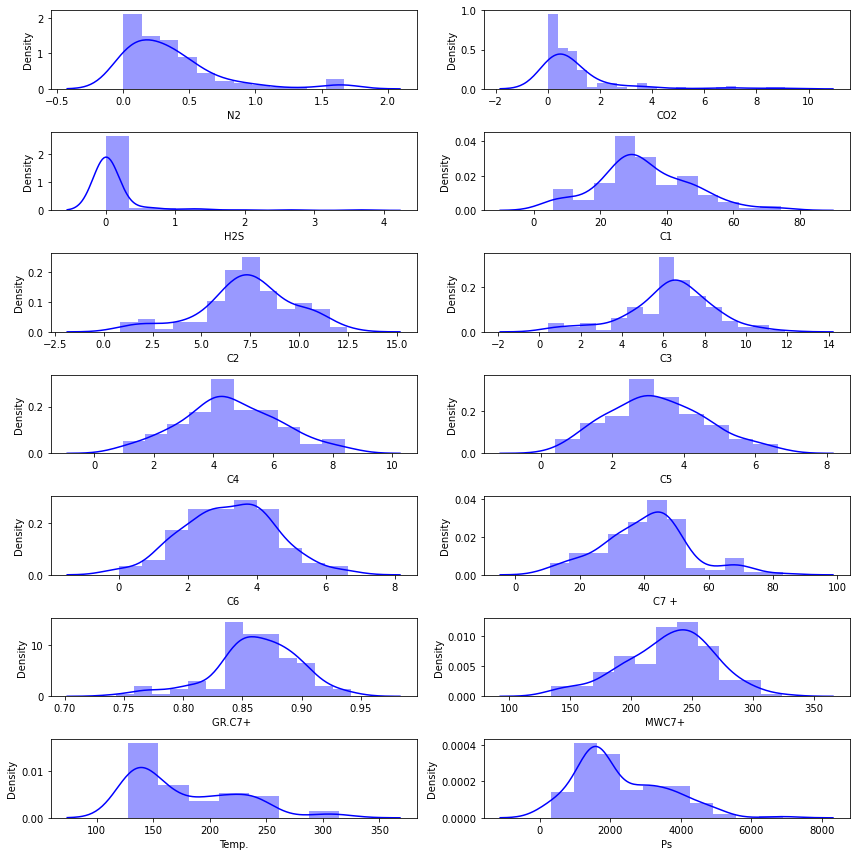

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axes = plt.subplots(7, 2, figsize=(12, 12))
columns = df.columns[:14]
i = 0
j = 0

for col in columns:
    sns.distplot(df[col], color="blue", ax=axes[i, j])
    
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1   

plt.tight_layout()


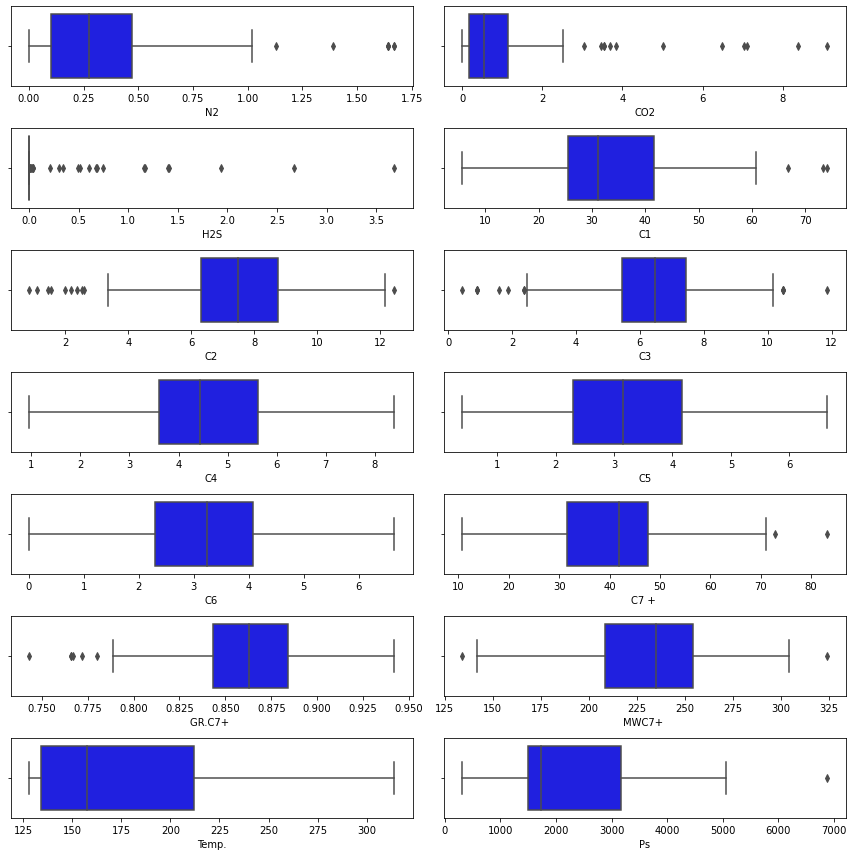

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axes = plt.subplots(7, 2, figsize=(12, 12))
columns = df.columns[:14]
i = 0
j = 0

for col in columns:
    sns.boxplot(df[col], color="blue", ax=axes[i, j])
    
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1   

plt.tight_layout()

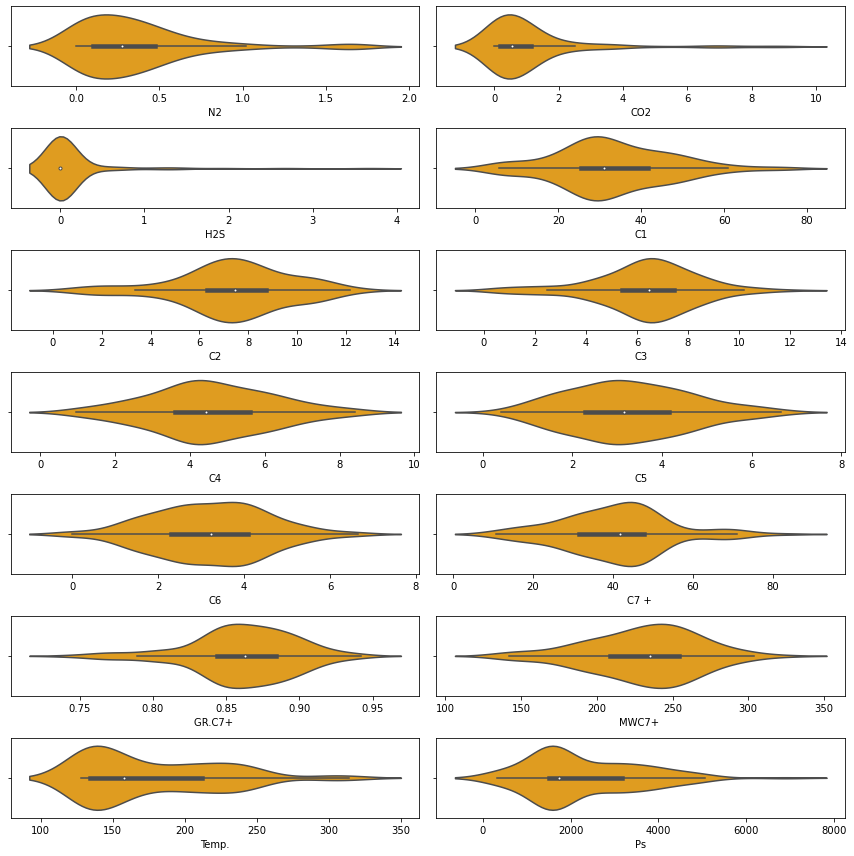

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig, axes = plt.subplots(7, 2, figsize=(12, 12))
columns = df.columns[:14]
i = 0
j = 0

for col in columns:
    sns.violinplot(df[col] , color="orange", ax=axes[i, j])
    
    if j == 0:
        j = 1
    else:
        j = 0
        i += 1   

plt.tight_layout()


<AxesSubplot:>

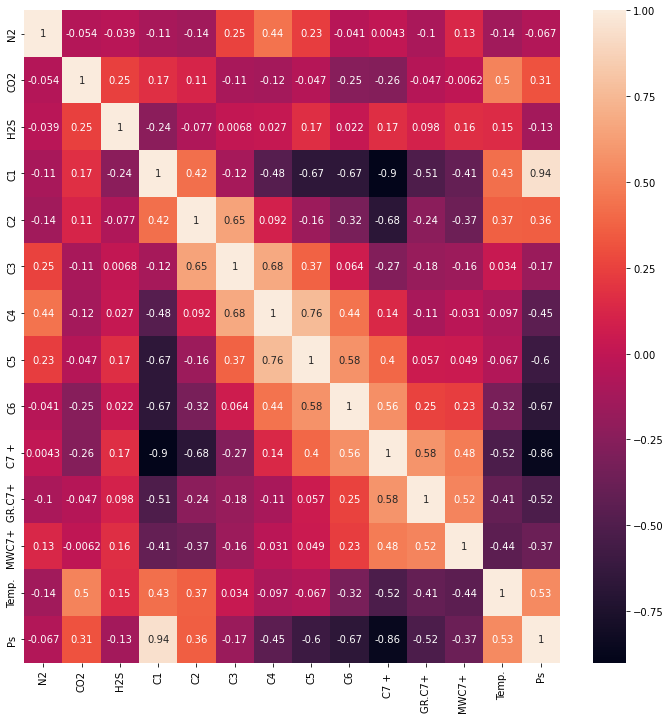

In [87]:
#let’s plot the Pearson correlation coefficient heat map as follows. 
plt.figure(figsize=(12,12))
sns.heatmap(df.iloc[:, :14].corr(), annot=True)

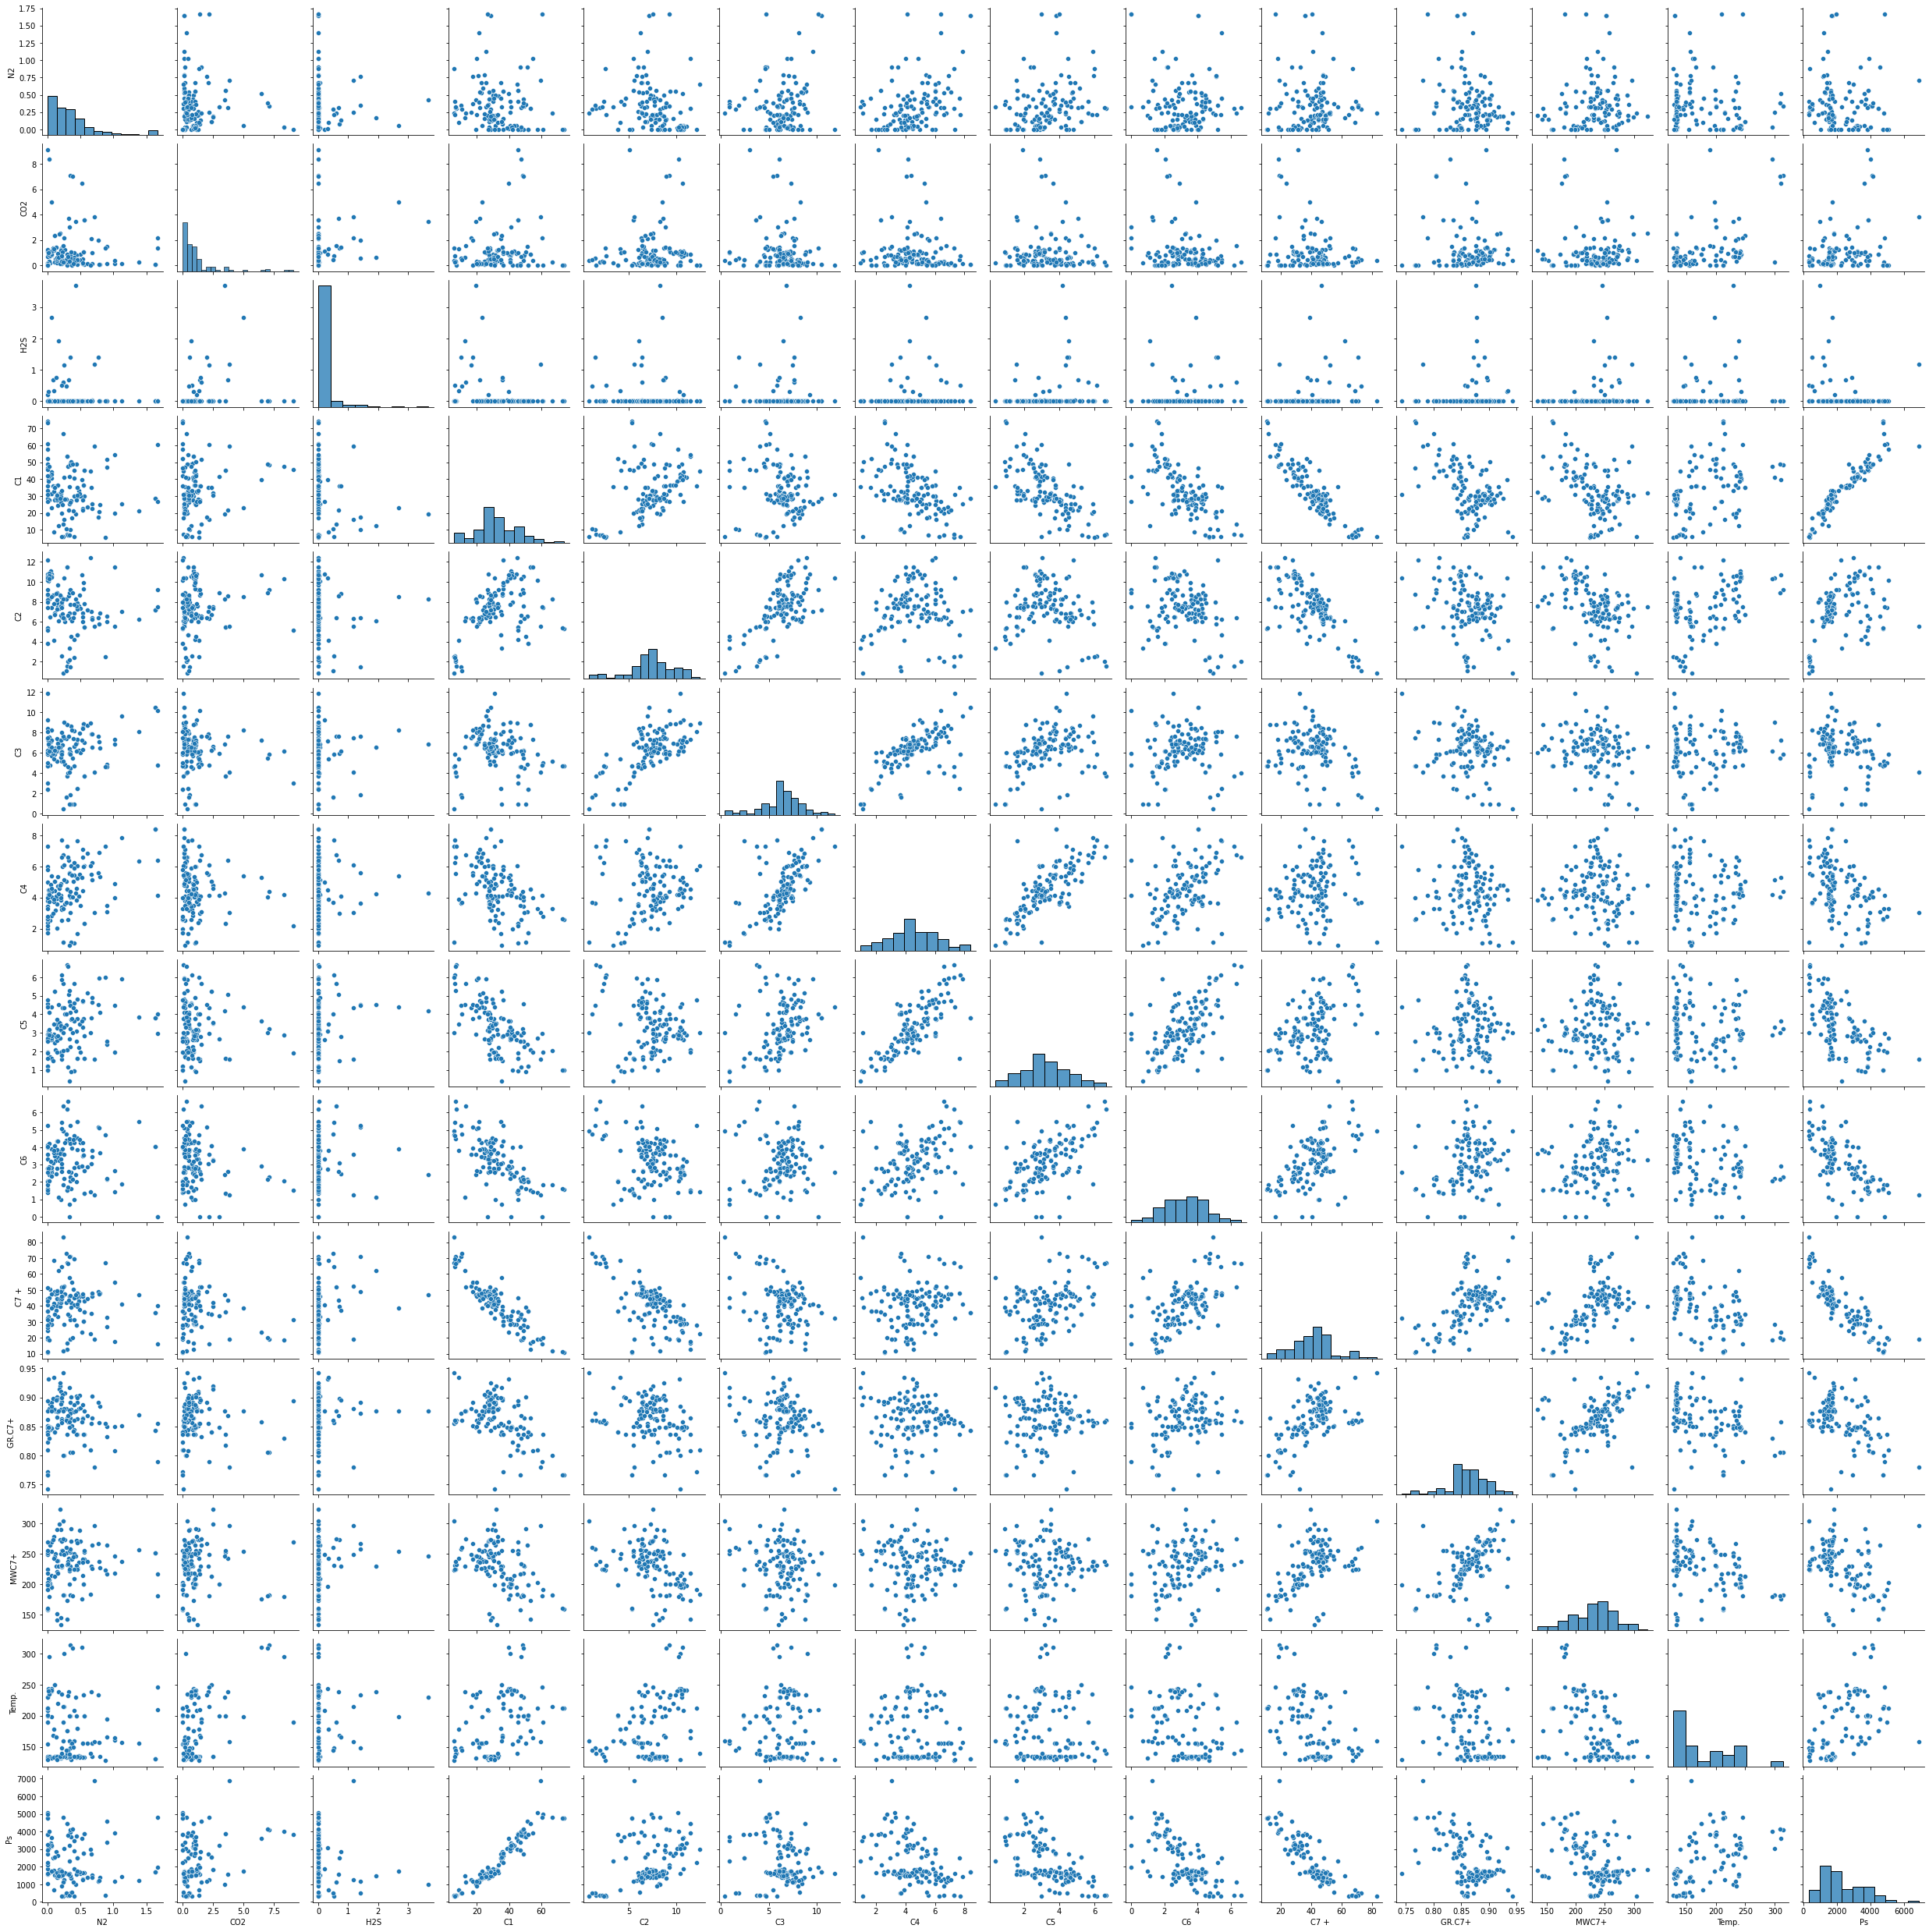

In [88]:
# Create the default pairplot
sns.pairplot(df.iloc[:, :14])

In [89]:
df.corrwith(df['Ps'])

N2         -0.066697
CO2         0.314463
H2S        -0.130770
C1          0.944578
C2          0.359813
C3         -0.171437
C4         -0.447057
C5         -0.599498
C6         -0.671813
C7 +       -0.857138
GR.C7+     -0.519035
MWC7+      -0.373167
Temp.       0.532616
Ps          1.000000
Ps-model    0.956678
Ps-SRK      0.955398
Ps-PR       0.975696
dtype: float64

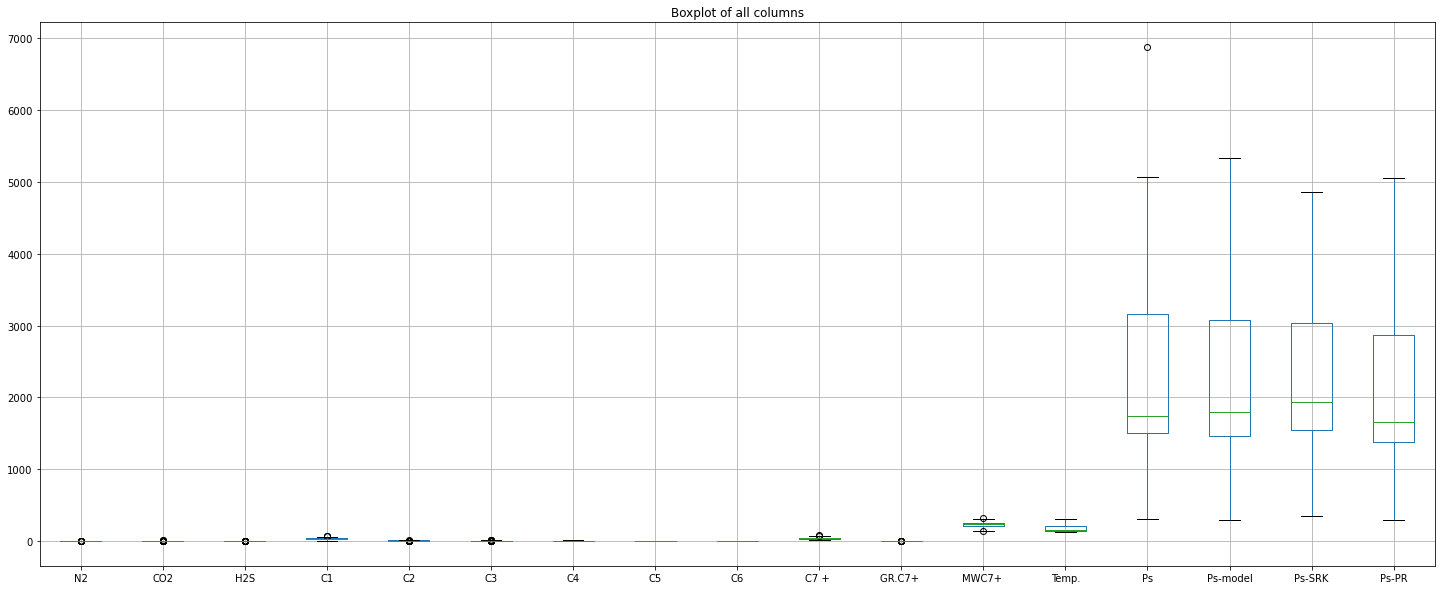

In [90]:
# Plot the boxplot for all columns in the DataFrame
plt.figure(figsize=(25, 10)) # Set the size of the plot
df.boxplot() # Plot the boxplot
plt.title('Boxplot of all columns') # Add a title to the plot
plt.show() # Show the plot

In [91]:
df.columns

Index(['N2', 'CO2', 'H2S', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7 + ',
       'GR.C7+ ', 'MWC7+ ', 'Temp.', 'Ps', 'Ps-model', 'Ps-SRK', 'Ps-PR'],
      dtype='object')

# Bubble Point Pressure Models

In [92]:
# define input and target variables
X = df[['N2', 'CO2', 'H2S', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7 + ','GR.C7+ ', 'MWC7+ ', 'Temp.']]
y = df['Ps']
y = np.array(y).reshape(-1, 1)


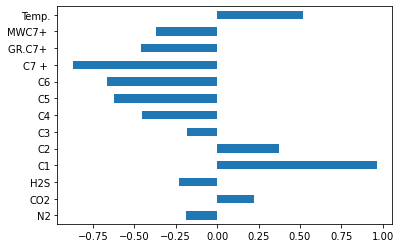

In [93]:
X_df = pd.DataFrame(X, columns=['N2', 'CO2', 'H2S', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7 + ','GR.C7+ ', 'MWC7+ ', 'Temp.'])
X_df1 = df[['N2', 'CO2', 'H2S', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7 + ','GR.C7+ ', 'MWC7+ ', 'Temp.', 'Ps']]
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
datanorm=sc.fit_transform(X_df1)
stats.spearmanr(X_df1)
rho, pval=stats.spearmanr(datanorm)
corr=pd.Series(rho[:13,13], index=X_df.columns)
corr.plot(kind='barh')
plt.show()

In [94]:
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
Xscaler = StandardScaler()
yscaler = StandardScaler()

# fit the scaler to X and y and transform them
X = Xscaler.fit_transform(X)
y = yscaler.fit_transform(y)

In [95]:
# split the dat into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

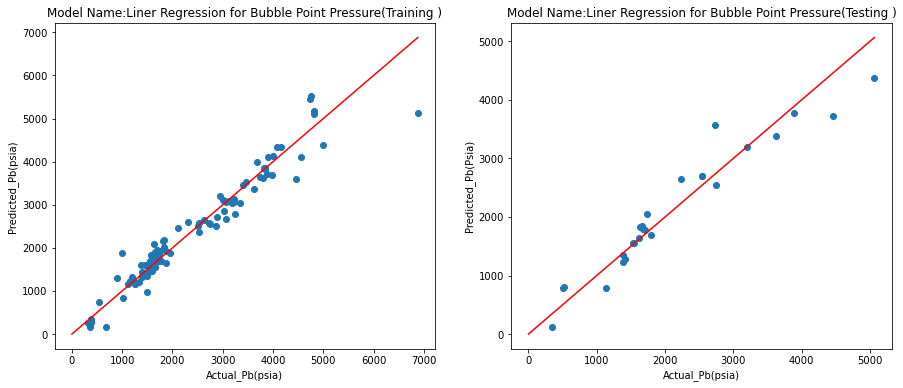

Training Data:
R2: 0.9396719715197028
RMSE: 312.644891100106
Testing Data:
R2: 0.9237322028985147
RMSE: 319.03670098979126


In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# create a LinearRegression object
lr = LinearRegression()

# fit the model to the training data
lr.fit(X_train, y_train)

# make predictions for the training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred)
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred)
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# calculate r2 for training and testing data
r2_trainlr = r2_score(y_train_denorm, y_train_pred_denorm)
r2_testlr = r2_score(y_test_denorm, y_test_pred_denorm)

# calculate rmse for training and testing data
rmse_trainlr = mean_squared_error(y_train_denorm, y_train_pred_denorm, squared=False)
rmse_testlr = mean_squared_error(y_test_denorm, y_test_pred_denorm, squared=False)


# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name:Liner Regression for Bubble Point Pressure(Training )')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name:Liner Regression for Bubble Point Pressure(Testing )')

# Display the figure
plt.show()
plt.tight_layout

# print the r2 and rmse values in a table
print('Training Data:')
print('R2:', r2_trainlr)
print('RMSE:', rmse_trainlr)
print('Testing Data:')
print('R2:', r2_testlr)
print('RMSE:', rmse_testlr)



# Random Forest

Best hyperparameters: {'max_depth': None, 'n_estimators': 100}
Training Data (CV):
R2: 0.9210148801203542
RMSE: 0.27286230928854144
Testing Data (CV):
R2: 0.6555119804622885
RMSE: 0.45630078719452294


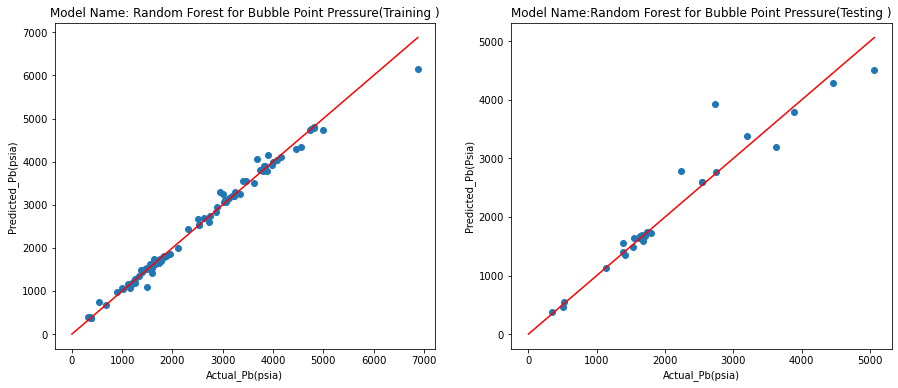

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameters to search over
params = {'n_estimators': [50, 100, 200],
          'max_depth': [None, 5, 10]}
# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
rf_best = grid_search.best_estimator_

# Make predictions for the training and testing data using the best estimator
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# Calculate r2 for training and testing data using cross-validation
r2_train_cvrf = np.mean(cross_val_score(rf_best, X_train, y_train, cv=5, scoring='r2'))
r2_test_cvrf = np.mean(cross_val_score(rf_best, X_test, y_test, cv=5, scoring='r2'))

# Calculate RMSE for training and testing data using cross-validation
rmse_train_cvrf = np.mean(np.sqrt(-cross_val_score(rf_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
rmse_test_cvrf = np.mean(np.sqrt(-cross_val_score(rf_best, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))

# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name: Random Forest for Bubble Point Pressure(Training )')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name:Random Forest for Bubble Point Pressure(Testing )')


# Print the best hyperparameters and performance metrics in a table
print('Best hyperparameters:', grid_search.best_params_)
print('Training Data (CV):')
print('R2:', r2_train_cvrf)
print('RMSE:', rmse_train_cvrf)
print('Testing Data (CV):')
print('R2:', r2_test_cvrf)
print('RMSE:', rmse_test_cvrf)



Text(0.5, 1.0, 'Feature Importance Ranking')

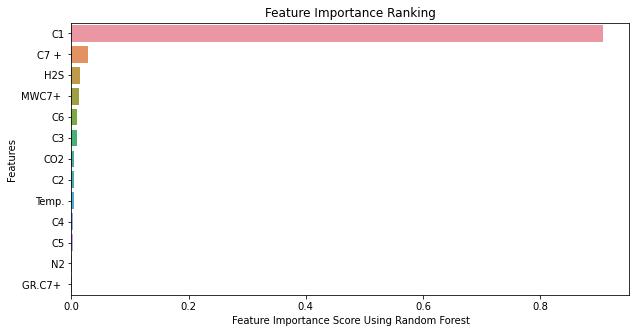

In [98]:
#feature importance of Random Forest 
feature_names =X_df.columns
plt.figure(figsize=(10,5))
feature_imp = pd.Series(rf_best.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Random Forest')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

# Support Vector Machine 


Best hyperparameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Training Data (CV):
R2: 0.9190003481275321
RMSE: 0.27797629384741007
Testing Data (CV):
R2: 0.8086268074388272
RMSE: 0.3629360503452408


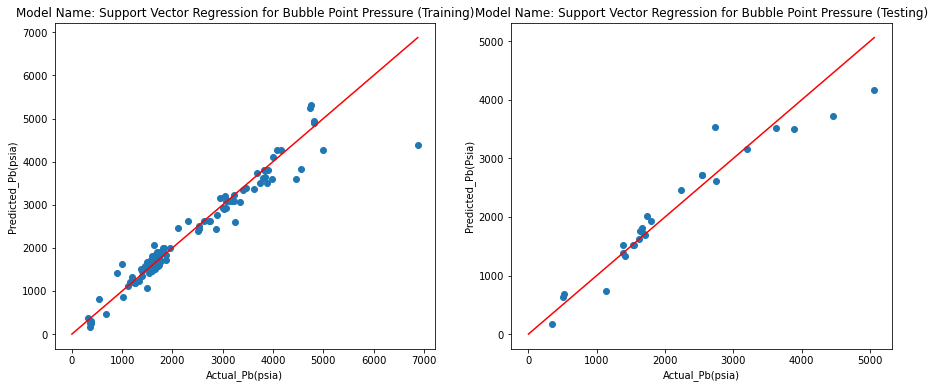

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Create a Support Vector Regressor object
svr = SVR()

# Define the hyperparameters to search over
params = {'C': [0.1, 1, 10],
          'kernel': ['linear', 'rbf', 'poly'],
          'epsilon': [0.01, 0.1, 1,10,100]}

# Create a GridSearchCV object
grid_search = GridSearchCV(svr, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
svr_best = grid_search.best_estimator_

# Make predictions for the training and testing data using the best estimator
y_train_pred = svr_best.predict(X_train)
y_test_pred = svr_best.predict(X_test)

# Denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# Calculate r2 for training and testing data using cross-validation
r2_train_cvsv = np.mean(cross_val_score(svr_best, X_train, y_train, cv=5, scoring='r2'))
r2_test_cvsv = np.mean(cross_val_score(svr_best, X_test, y_test, cv=5, scoring='r2'))

# Calculate RMSE for training and testing data using cross-validation
rmse_train_cvsv = np.mean(np.sqrt(-cross_val_score(svr_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
rmse_test_cvsv = np.mean(np.sqrt(-cross_val_score(svr_best, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))

# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name: Support Vector Regression for Bubble Point Pressure (Training)')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name: Support Vector Regression for Bubble Point Pressure (Testing)')

# Print the best hyperparameters and performance metrics in a table
print('Best hyperparameters:', grid_search.best_params_)
print('Training Data (CV):')
print('R2:', r2_train_cvsv)
print('RMSE:', rmse_train_cvsv)
print('Testing Data (CV):')
print('R2:', r2_test_cvsv)
print('RMSE:', rmse_test_cvsv)

# XGB Model

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Training Data (CV):
R2: 0.9441425048973076
RMSE: 0.232314197651713
Testing Data (CV):
R2: 0.5722661151245786
RMSE: 0.44740352902473235


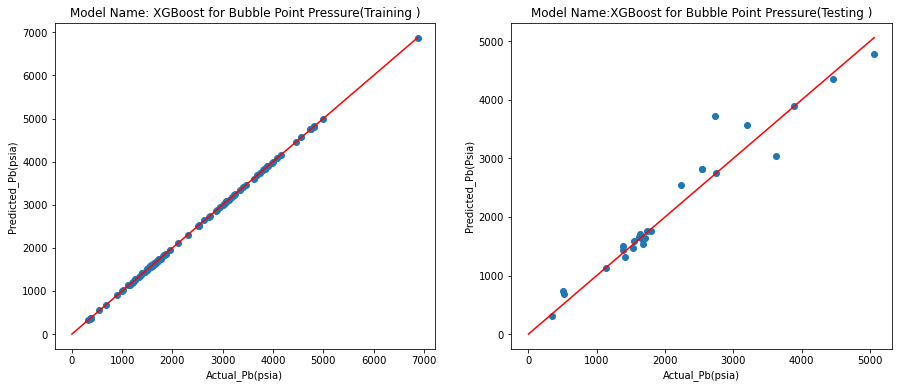

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Create an XGBoost Regressor object
xgb = XGBRegressor()

# Define the hyperparameters to search over
params = {'n_estimators': [50, 200, 500],
          'max_depth': [3,5, 10],
          'learning_rate': [0.1, 0.01],
          'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0],'n_estimators': [50, 100, 200]}


# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
xgb_best = grid_search.best_estimator_

# Make predictions for the training and testing data using the best estimator
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

# Denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# Calculate r2 for training and testing data using cross-validation
r2_train_cvxg = np.mean(cross_val_score(xgb_best, X_train, y_train, cv=5, scoring='r2'))
r2_test_cvxg = np.mean(cross_val_score(xgb_best, X_test, y_test, cv=5, scoring='r2'))

# Calculate RMSE for training and testing data using cross-validation
rmse_train_cvxg = np.mean(np.sqrt(-cross_val_score(xgb_best, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
rmse_test_cvxg = np.mean(np.sqrt(-cross_val_score(xgb_best, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))

# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name: XGBoost for Bubble Point Pressure(Training )')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name:XGBoost for Bubble Point Pressure(Testing )')

# Print the best hyperparameters and performance metrics in a table
print('Best hyperparameters:', grid_search.best_params_)
print('Training Data (CV):')
print('R2:', r2_train_cvxg)
print('RMSE:', rmse_train_cvxg)
print('Testing Data (CV):')
print('R2:', r2_test_cvxg)
print('RMSE:', rmse_test_cvxg)


# ANN Model

In [101]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define the function that creates the model
def create_model(num_layers, num_neurons, activation='relu'):
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation, input_dim=X_train.shape[1]))
    for i in range(num_layers-1):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Define the hyperparameters to search over
param_grid = {
    'num_layers': [1, 2, 3,5,10,20],
    'num_neurons': [8, 16, 32, 64],
    'epochs': [50, 100, 200]
}

# Create the Keras model
model = KerasRegressor(build_fn=create_model, verbose=0)

# Perform a grid search over the hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters of the model
print(f'Best hyperparameters: {grid_result.best_params_}')

# Evaluate the best model on the test set
best_model = grid.best_estimator_
test_loss = best_model.model.evaluate(X_test, y_test)

print(f'Test loss: {test_loss}')


Best hyperparameters: {'epochs': 100, 'num_layers': 3, 'num_neurons': 64}
1/1 [==============================] - 0s 77ms/step - loss: 0.0474
Test loss: 0.04738589748740196


Best hyperparameters: {'epochs': 100, 'num_layers': 3, 'num_neurons': 64}
Training Data (CV):
R2: 0.9063508570219616
RMSE: 0.3021310740134512
Testing Data (CV):
R2: 0.7898903282832913
RMSE: 0.35905763394441437


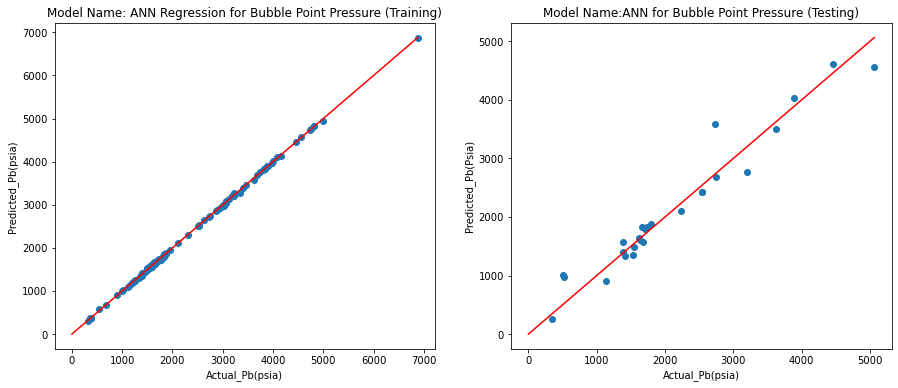

In [102]:
# Make predictions for the training and testing data using the best estimator
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Denormalize the predicted values
y_train_pred_denorm = yscaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_denorm = yscaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()
y_train_denorm = yscaler.inverse_transform(y_train)
y_test_denorm = yscaler.inverse_transform(y_test)

# Calculate r2 for training and testing data using cross-validation
r2_train_cvnn = np.mean(cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2'))
r2_test_cvnn = np.mean(cross_val_score(best_model, X_test, y_test, cv=5, scoring='r2'))

# Calculate RMSE for training and testing data using cross-validation
rmse_train_cvnn = np.mean(np.sqrt(-cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))
rmse_test_cvnn = np.mean(np.sqrt(-cross_val_score(best_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')))


# Create a figure with one row and two columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the training data with best-fit line
axs[0].scatter(y_train_denorm, y_train_pred_denorm)
axs[0].plot(np.linspace(0, np.max(y_train_denorm)), np.linspace(0, np.max(y_train_denorm)), 'r')
axs[0].set_xlabel('Actual_Pb(psia)')
axs[0].set_ylabel('Predicted_Pb(psia)')
axs[0].set_title('Model Name: ANN Regression for Bubble Point Pressure (Training)')

# Plot the testing data with best-fit line
axs[1].scatter(y_test_denorm, y_test_pred_denorm)
axs[1].plot(np.linspace(0, np.max(y_test_denorm)), np.linspace(0, np.max(y_test_denorm)), 'r')
axs[1].set_xlabel('Actual_Pb(psia)')
axs[1].set_ylabel('Predicted_Pb(Psia)')
axs[1].set_title('Model Name:ANN for Bubble Point Pressure (Testing)')
# Print the best hyperparameters and performance metrics in a table
print('Best hyperparameters:', grid_result.best_params_)
print('Training Data (CV):')
print('R2:', r2_train_cvnn)
print('RMSE:', rmse_train_cvnn)
print('Testing Data (CV):')
print('R2:', r2_test_cvnn)
print('RMSE:', rmse_test_cvnn)

# Comparison Between the Machine Learning Models

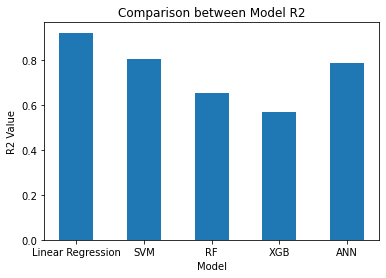

In [103]:
import matplotlib.pyplot as plt

# x-axis labels
models = ['Linear Regression', 'SVM', 'RF', 'XGB', 'ANN']

# y-axis values
R2_values = [r2_testlr, r2_test_cvsv, r2_test_cvrf, r2_test_cvxg, r2_test_cvnn]

# create bar plot with some extra space between the bars
plt.bar(models, R2_values, width=0.5)

# set x-axis label
plt.xlabel('Model')

# set y-axis label
plt.ylabel('R2 Value')

# set plot title
plt.title('Comparison between Model R2')



# show the plot
plt.show()


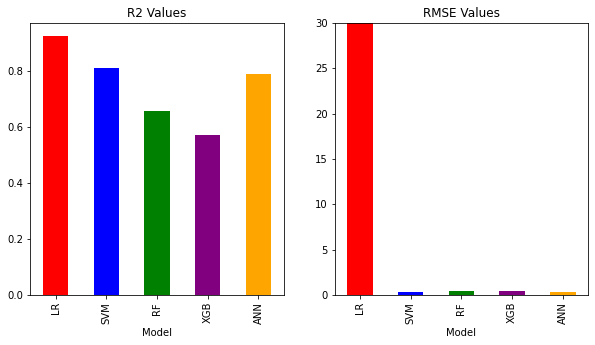

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# x-axis labels
models = ['LR', 'SVM', 'RF', 'XGB', 'ANN']

# y-axis values
R2_values = [r2_testlr, r2_test_cvsv, r2_test_cvrf, r2_test_cvxg, r2_test_cvnn]
rmse_values = [rmse_testlr, rmse_test_cvsv, rmse_test_cvrf, rmse_test_cvxg, rmse_test_cvnn]

# create two DataFrames with the models and R2_values and rmse_values
dfr2 = pd.DataFrame({'Model': models, 'R2 Value': R2_values})
dfrmse = pd.DataFrame({'Model': models, 'RMSE Value': rmse_values})

# merge the two DataFrames based on the 'Model' column
dfn = pd.merge(dfr2, dfrmse, on='Model')

# set the index to 'Model'
dfn.set_index('Model', inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
dfn['R2 Value'].plot.bar(ax=ax[0], color=['red', 'blue', 'green', 'purple', 'orange'])
ax[0].set_title('R2 Values')
dfn['RMSE Value'].plot.bar(ax=ax[1], color=['red', 'blue', 'green', 'purple', 'orange'])
ax[1].set_title('RMSE Values')
ax[1].set_ylim(0, 30)
plt.show()


In [104]:
# x-axis labels
models = ['Linear Regression', 'SVM', 'RF', 'XGB', 'ANN']

# y-axis values
R2_values = [r2_testlr, r2_test_cvsv, r2_test_cvrf, r2_test_cvxg, r2_test_cvnn]
rmse_values = [rmse_testlr, rmse_test_cvsv, rmse_test_cvrf, rmse_test_cvxg, rmse_test_cvnn]

# create two DataFrames with the models and R2_values and rmse_values
dfr2 = pd.DataFrame({'Model': models, 'R2 Value': R2_values})
dfrmse = pd.DataFrame({'Model': models, 'RMSE Value': rmse_values})

# merge the two DataFrames based on the 'Model' column
dfn = pd.merge(dfr2, dfrmse, on='Model')
dfn



,Model,R2 Value,RMSE Value
0,Linear Regression,0.923732,319.036701
1,SVM,0.808627,0.362936
2,RF,0.655512,0.456301
3,XGB,0.572266,0.447404
4,ANN,0.789890,0.359058


In [115]:
X_df.columns

Index(['N2', 'CO2', 'H2S', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7 + ',
       'GR.C7+ ', 'MWC7+ ', 'Temp.'],
      dtype='object')

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=0)
x = df.iloc[:, :13]
# create the multilinear regression model
mlr = LinearRegression()

# fit the model to the training data
mlr.fit(X_train, y_train)

# print the equation of the multilinear regression
equation = "BPP = {:.2f}".format(mlr.intercept_)
for i, coef in enumerate(mlr.coef_):
    equation += " + {:.2f}{}".format(coef, x.columns[i])
print("Equation of the Multilinear Regression: " + equation)

Equation of the Multilinear Regression: BPP = -0.01 + -0.03N2 + -0.15CO2 + -0.02H2S + -1.05C1 + -0.25C2 + -0.51C3 + -0.03C4 + -0.26C5 + -0.22C6 + -1.86C7 +  + -0.06GR.C7+  + 0.08MWC7+  + 0.13Temp.
